In [2]:
import csv
from matplotlib import pyplot as plt
import squarify

1. Sử dụng dữ liệu bán hàng 'supermarket_sales_vn.csv':
● Vẽ biểu đồ cột, pie về tần số, tuần suất đơn hàng theo
− Địa phương (HN, SG, ĐN)
− Giới tính

Text(0.5, 1.0, 'Đồ thị tần suất đơn hàng theo khu vực')

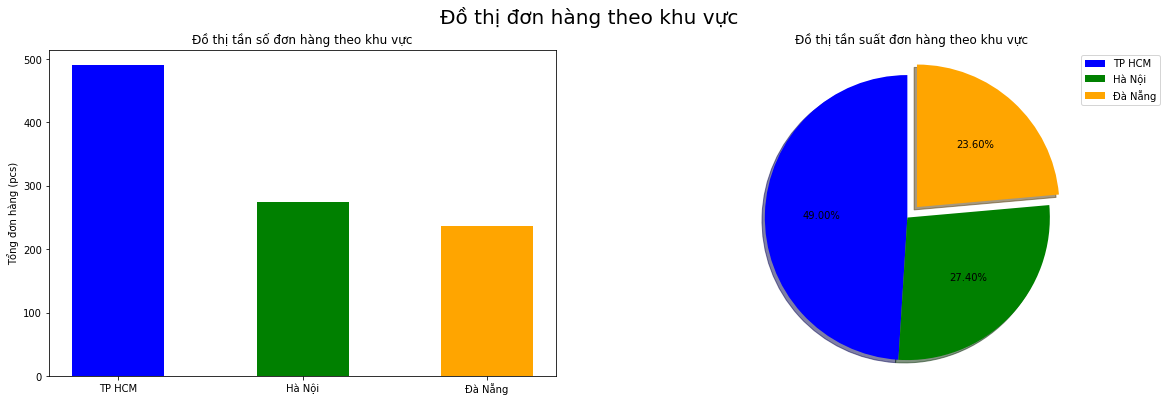

In [3]:

def readFile(filePath):
    output = []
    with open(filePath, mode = 'r',encoding='utf-8') as f:
        data_reader = csv.reader(f)
        next(data_reader)
        for row in data_reader:
            output.append(row)
    return output

raw_data = readFile('supermarket_sales_vn.csv')

city = [item[1] for item in raw_data]
gender = [item[3] for item in raw_data]
city_object = {x: [city.count(x), 100 * city.count(x) / len(city)] for x in set(city)}
gender_object = {x: [gender.count(x), 100 * gender.count(x) / len(city)] for x in set(gender)}

fig = plt.figure(figsize=(20,6))
fig.suptitle('Đồ thị đơn hàng theo khu vực', fontsize=20)
ax1 = fig.add_subplot(1,2,1)
bars = ax1.bar(x=range(3),height= [city_object[item][0] for item in city_object] ,
               width = 0.5,align = 'center',color=['blue','green','orange'])
plt.xticks(range(3),city_object.keys())
ax1.set(ylabel="Tổng đơn hàng (pcs)", title ='Đồ thị tần số đơn hàng theo khu vực')

ax2 = fig.add_subplot(1,2,2)
explodes = (0, 0, 0.1)
ax2.pie([city_object[item][1] for item in city_object],explode=explodes,
        autopct='%1.2f%%', shadow=True, startangle=90,colors=['blue','green','orange'])
ax2.axis('equal')
ax2.legend(city_object.keys(), loc="best")
ax2.set_title('Đồ thị tần suất đơn hàng theo khu vực')

● Vẽ biểu đồ histogram về phân bố giá trị đơn hàng, rating
− Phân bố chung
− Theo giới tính, theo địa phương

In [4]:
def Gender_process(data,position_value):
    male = []
    female = []
    for item in data:
        if item[3] == "Nam": male.append(float(item[position_value]))
        elif item[3] == "Nữ": female.append(float(item[position_value]))
    return {"Nam": male, "Nữ": female}

def City_process(data,position_value):
    HN = []
    HCM = []
    DN = []
    for item in data:
        if item[1] == "Hà Nội": HN.append(float(item[position_value]))
        elif item[1] == "TP HCM": HCM.append(float(item[position_value]))
        elif item[1] == "Đà Nẵng": DN.append(float(item[position_value]))
    return {"Hà Nội": HN, "TP HCM": HCM, "Đà Nẵng": DN}

def process_data(data, position_value, depend_value = "All"):
    if(depend_value == "All"):
        output = []
        for item in data:
            output.append(float(item[position_value]))
        return output
    elif depend_value == "Gender":
        return Gender_process(data, position_value)
    elif depend_value == "City":
        return City_process(data, position_value)

total = process_data(raw_data, 8)
total_gender = process_data(raw_data, 8, "Gender")
total_city = process_data(raw_data,8, "City")

rating = process_data(raw_data, -1)
rating_gender = process_data(raw_data, -1, "Gender")
rating_city = process_data(raw_data, -1, "City")


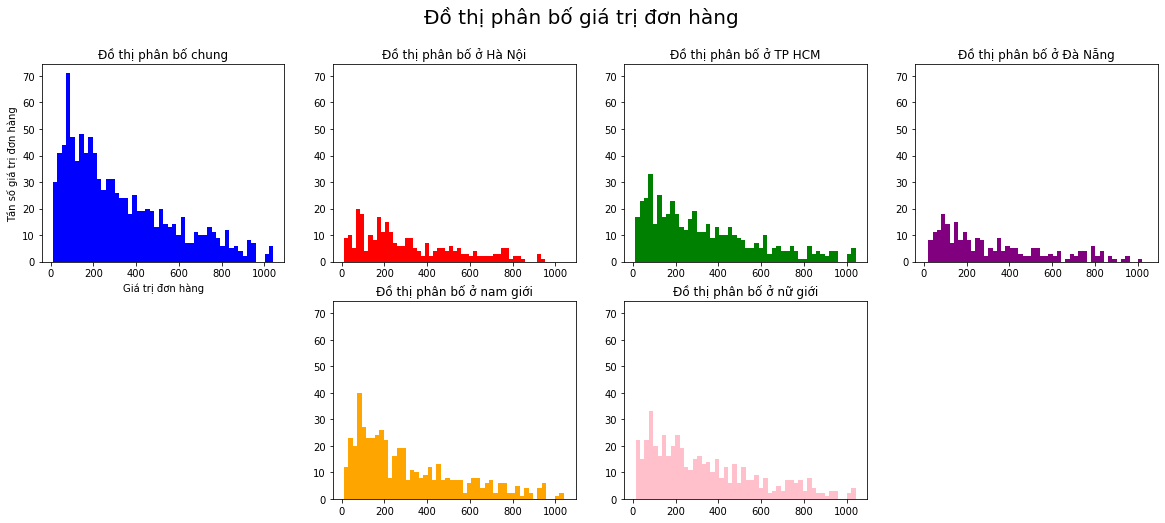

In [5]:
## plot for total
fig = plt.figure(figsize=(20,8))
fig.suptitle('Đồ thị phân bố giá trị đơn hàng', fontsize=20)

ax1 = fig.add_subplot(2,4,1)
ax1.hist(total,bins=50,color='blue')
ax1.set_xlabel(xlabel='Giá trị đơn hàng')
ax1.set_ylabel(ylabel='Tần số giá trị đơn hàng')
ax1.set_title('Đồ thị phân bố chung')

ax11 = fig.add_subplot(2,4,2, sharey=ax1, sharex=ax1)
ax11.hist(total_city["Hà Nội"],bins=50,color='red') 
ax11.set_title('Đồ thị phân bố ở Hà Nội')

ax12 = fig.add_subplot(2,4,3, sharey=ax1, sharex=ax1)
ax12.hist(total_city["TP HCM"],bins=50,color='green')
ax12.set_title('Đồ thị phân bố ở TP HCM')

ax13 = fig.add_subplot(2,4,4, sharey=ax1, sharex=ax1)
ax13.hist(total_city["Đà Nẵng"],bins=50,color='purple')
ax13.set_title('Đồ thị phân bố ở Đà Nẵng')

ax2 = fig.add_subplot(2,4,6, sharey=ax1, sharex=ax1)
ax2.hist(total_gender["Nam"],bins=50,color='orange')
ax2.set_title('Đồ thị phân bố ở nam giới')

ax21 = fig.add_subplot(2,4,7, sharey=ax1, sharex=ax1)
ax21.hist(total_gender["Nữ"],bins=50,color='pink') 
ax21.set_title('Đồ thị phân bố ở nữ giới')

plt.show()

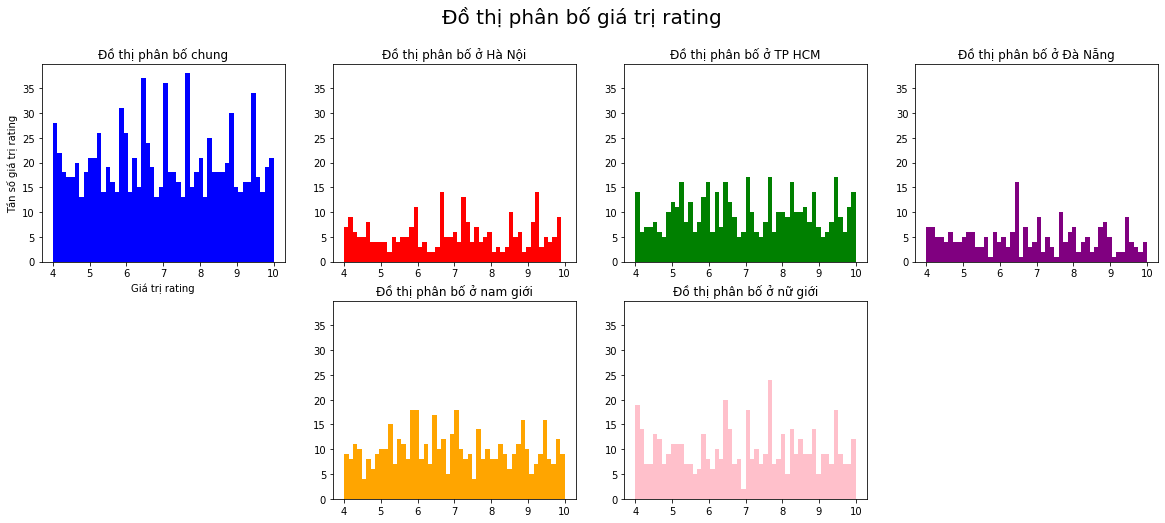

In [6]:
##plot for rating
fig2 = plt.figure(figsize=(20,8))
fig2.suptitle('Đồ thị phân bố giá trị rating', fontsize=20)

ax3 = fig2.add_subplot(2,4,1)
ax3.hist(rating,bins=50,color='blue')
ax3.set_xlabel(xlabel='Giá trị rating')
ax3.set_ylabel(ylabel='Tần số giá trị rating')
ax3.set_title('Đồ thị phân bố chung')

ax31 = fig2.add_subplot(2,4,2,sharey=ax3,sharex=ax3)
ax31.hist(rating_city["Hà Nội"],bins=50,color='red')
ax31.set_title('Đồ thị phân bố ở Hà Nội')

ax32 = fig2.add_subplot(2,4,3,sharey=ax3,sharex=ax3)
ax32.hist(rating_city["TP HCM"],bins=50,color='green') 
ax32.set_title('Đồ thị phân bố ở TP HCM')

ax33 = fig2.add_subplot(2,4,4,sharey=ax3,sharex=ax3)
ax33.hist(rating_city["Đà Nẵng"],bins=50,color='purple')
ax33.set_title('Đồ thị phân bố ở Đà Nẵng')

ax4 = fig2.add_subplot(2,4,6,sharey=ax3,sharex=ax3)
ax4.hist(rating_gender["Nam"],bins=50,color='orange') 
ax4.set_title('Đồ thị phân bố ở nam giới')

ax4 = fig2.add_subplot(2,4,7,sharey=ax3,sharex=ax3)
ax4.hist(rating_gender["Nữ"],bins=50,color='pink') 
ax4.set_title('Đồ thị phân bố ở nữ giới')

plt.show()

● Vẽ biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating

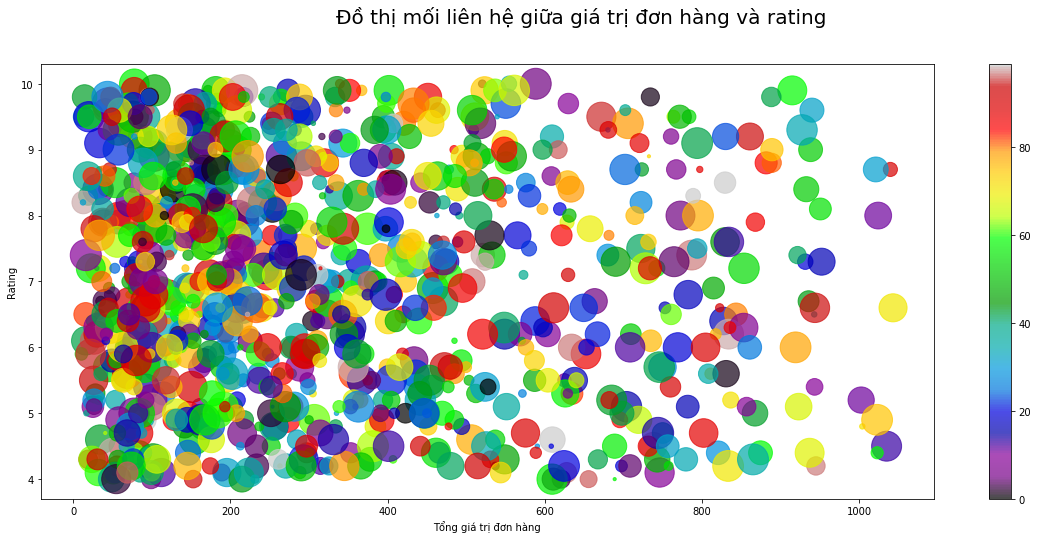

In [7]:
import numpy as np
fig = plt.figure(figsize = (20,8))
fig.suptitle('Đồ thị mối liên hệ giữa giá trị đơn hàng và rating', fontsize=20)

colors = np.random.randint(100, size=(len(rating)))
sizes = 10 * np.random.randint(100, size=(len(rating)))

plt.scatter(total,rating,s=sizes,c=colors,alpha=0.7,cmap='nipy_spectral')
plt.xlabel('Tổng giá trị đơn hàng')
plt.ylabel('Rating')
plt.colorbar()
plt.show()

● Vẽ biểu đồ tree-map cho các mặt hàng ('Product line')

(0.0, 100.0, 0.0, 100.0)

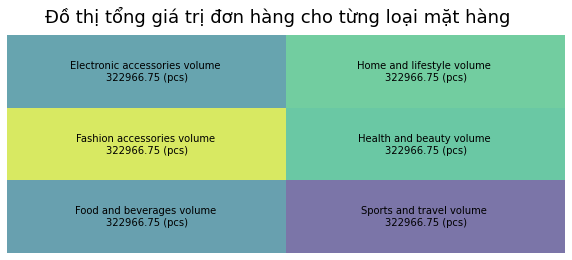

In [10]:
product_line = [row[4] for row in raw_data]
product_line_unique = list(set(product_line))
output = {}

for item in product_line_unique:
    temp = []
    for row in raw_data:
        temp.append(float(row[8]))
    output[item] = sum(temp)
    
fig1 = plt.figure(figsize=(10,4))
fig1.suptitle('Đồ thị tổng giá trị đơn hàng cho từng loại mặt hàng', fontsize=18)
labels_new = [item + ' volume \n'+str(round(output[item],2)) + ' (pcs)' for item in output]
volume = [round(output[item],2) for item in output]
squarify.plot(sizes=volume, label=labels_new, alpha=0.7)
plt.axis("off")